In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd

In [39]:
G = nx.DiGraph()
nodes = np.arange(0, 10).tolist()
G.add_nodes_from(nodes)
G.add_edges_from([(0,1), (0,2),
 (1,3), (1, 4),
 (2, 5), (2, 6), (2,7), (3,8), (3,9), (9,3), (4,0)])

In [40]:
pos = {0:(10, 10),
 1:(7.5, 7.5), 2:(12.5, 7.5),
 3:(6, 6), 4:(9, 6),
 5:(11, 6), 6:(14, 6), 7:(17, 6), 8:(3,3), 9:(9,3)}

In [41]:
d = {'nodes': pd.Series(np.arange(0, 10)) , 'predecessor': [None,0,0,1,1,2,2,2,3,3] }
df=pd.DataFrame(data=d)
df

,nodes,predecessor
0,0,NaN
1,1,0.0
2,2,0.0
3,3,1.0
4,4,1.0
5,5,2.0
6,6,2.0
7,7,2.0
8,8,3.0
9,9,3.0


In [42]:
H=nx.DiGraph()
nodes = df["nodes"].tolist()
print(nodes)
df=df.loc[:,["predecessor","nodes"]]
df=df.dropna(axis=0)
#print(df)
edges=[]
records=df.to_records(index=False)
result=list(records)
print(result)
H.add_nodes_from(nodes)
H.add_edges_from(result)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0., 1), (0., 2), (1., 3), (1., 4), (2., 5), (2., 6), (2., 7), (3., 8), (3., 9)]


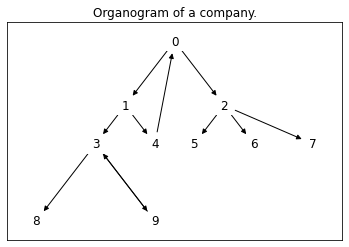

In [43]:
nx.draw_networkx(G, pos = pos,  arrows = True,
 node_shape = "s", node_color = "white")
plt.title("Organogram of a company.")

plt.show()

In [44]:
predecessors = [pred for pred in G.predecessors(9)]
print(predecessors)

[3]


In [45]:
successors = [success for success in G.successors(3)]
print(successors)

all_successors = nx.nodes(nx.dfs_tree(G, 0))

[8, 9]


In [46]:
def allDescendants(node,G):
    descendants=[]
    descendants = [success for success in G.successors(node)]
    
    if descendants==[]:
        print("no successors")
        return descendants
    else:
        #print(descendants)
        not_checked= copy.deepcopy(descendants)
        used=[]
        while not_checked != []:
            print("there are successors")
            for elem in not_checked:
                print(elem)
                if not (elem in used): 
                    used.append(elem) 
                    new_desc = [success for success in G.successors(elem)]
                    descendants+=new_desc
                    not_checked+=new_desc
                    not_checked.remove(elem)
                    print("this is the not_checked element after this iteration", not_checked)
                    print("this is the descendants element after this iteration", descendants)
                else:
                    not_checked.remove(elem) 
        descendants = list(dict.fromkeys(descendants))
        return descendants
    
def number_Descendants(descendants):
    return len(descendants)


In [50]:
allDescendants(2,G)

there are successors
5
this is the not_checked element after this iteration [6, 7]
this is the descendants element after this iteration [5, 6, 7]
7
this is the not_checked element after this iteration [6]
this is the descendants element after this iteration [5, 6, 7]
there are successors
6
this is the not_checked element after this iteration []
this is the descendants element after this iteration [5, 6, 7]


[5, 6, 7]